In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
# Parameters for the Ornstein-Uhlenbeck process
theta = 0.1
sigma = 0.01
initial_state = 0
t_span = (0, 300)
dt = 0.001

# Euler-Maruyama method for the Ornstein-Uhlenbeck process
def euler_maruyama_ou(x0, t_span, dt, theta, sigma):
    t0, tf = t_span
    t = np.linspace(t0, tf, int((tf - t0) / dt) + 1)
    x = np.zeros(len(t))

    x[0] = x0

    for i in range(len(t) - 1):
        noise_forcing = np.sqrt(dt) * np.random.normal(0, 1)
        x[i + 1] = x[i] - theta * x[i] * dt + sigma * noise_forcing

    return t, x

In [4]:
# Generate the data for the Ornstein-Uhlenbeck process
t, x = euler_maruyama_ou(initial_state, t_span, dt, theta, sigma)

# Create a DataFrame with x values
#df = pd.DataFrame({'x': x})


# Save the DataFrame as a CSV file
#df.to_csv('./ou_process_data.csv', index=False)

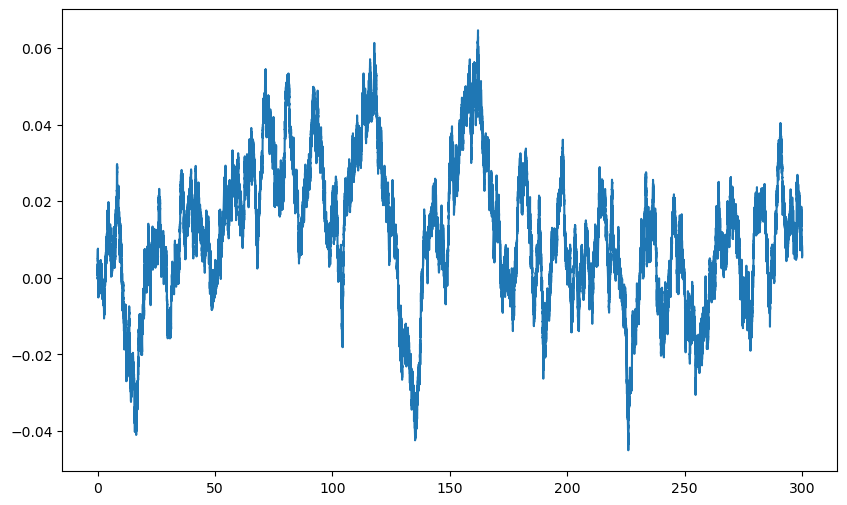

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(t,x,'-')

In [8]:
#Generate the data for the damped oscillation problem
def damped_oscillation(t, y, m, c, k):
    a = -c / m * y[1] - k / m * y[0]
    return [y[1], a]

if __name__ == "__main__":
    # Damped oscillation parameters
    m = 20.0
    c = 10.0
    k = 2e3

    # Initial conditions (displacement and velocity)
    y0 = [0, 0.1]

    # Time range
    t_start = 0
    t_end = 10
    t_points = 1000

    # Solve the damped oscillation problem
    t_eval = np.linspace(t_start, t_end, t_points)
    sol = solve_ivp(damped_oscillation, (t_start, t_end), y0, args=(m, c, k), t_eval=t_eval)

    # Save the data to a CSV file
    df = pd.DataFrame({"t": sol.t, "y": sol.y[0], "ydot": sol.y[1]})
    df.to_csv("./damped_data.csv", index=False)

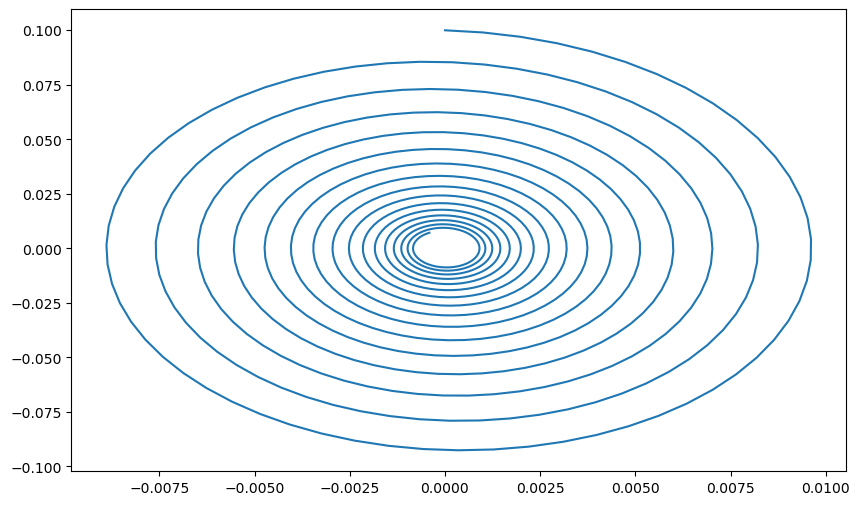

In [9]:
#plot distance vs time
plt.figure(figsize=(10, 6))
plt.plot(sol.y[0],sol.y[1],'-')


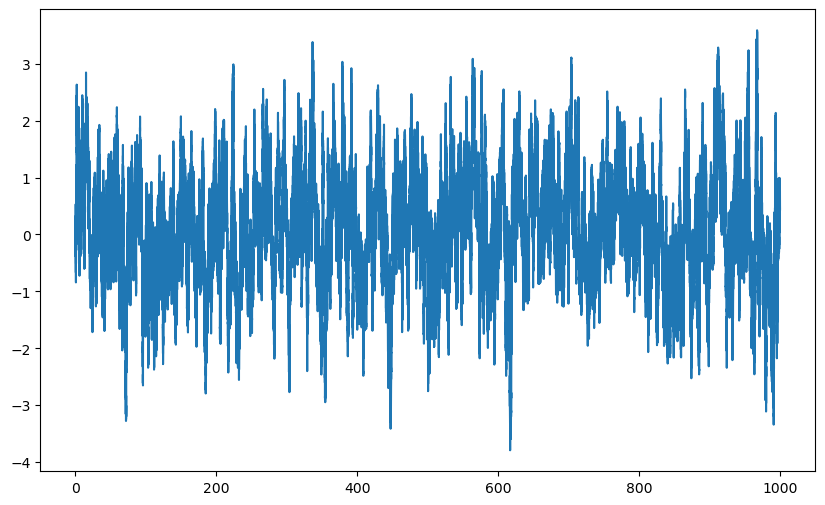

In [17]:
def generate_data():
    m = 20.0
    damping = 10.0
    dt = .001
    T = 1000

    t = np.linspace(0, T, int(T / dt) + 1)
    v = np.zeros(t.shape)

    v[0] = 0.1

    for i in range(0, len(t) - 1):
        v[i + 1] = v[i] - damping * v[i] * dt / m + np.sqrt(dt) * np.random.normal(0, 1)

    # Save the data to a CSV file
    df = pd.DataFrame({"t": t, "v": v})
    df.to_csv("./langevin_data.csv", index=False)

    plt.figure(figsize=(10, 6))
    plt.plot(t,v,'-')

generate_data()